### 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

### 2. Load Data

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Credit Card DataFrame Column:", df.columns)

Credit Card DataFrame Column: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


### 3. EDA

In [5]:
# Inspect the dataset
print(df.head())
print(df.info())
print(df.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

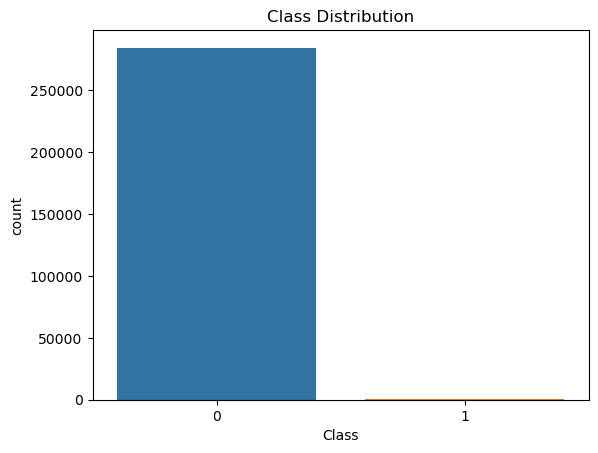

In [7]:
# Visualize the class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [8]:
# All the transaction belongs to 0 class.

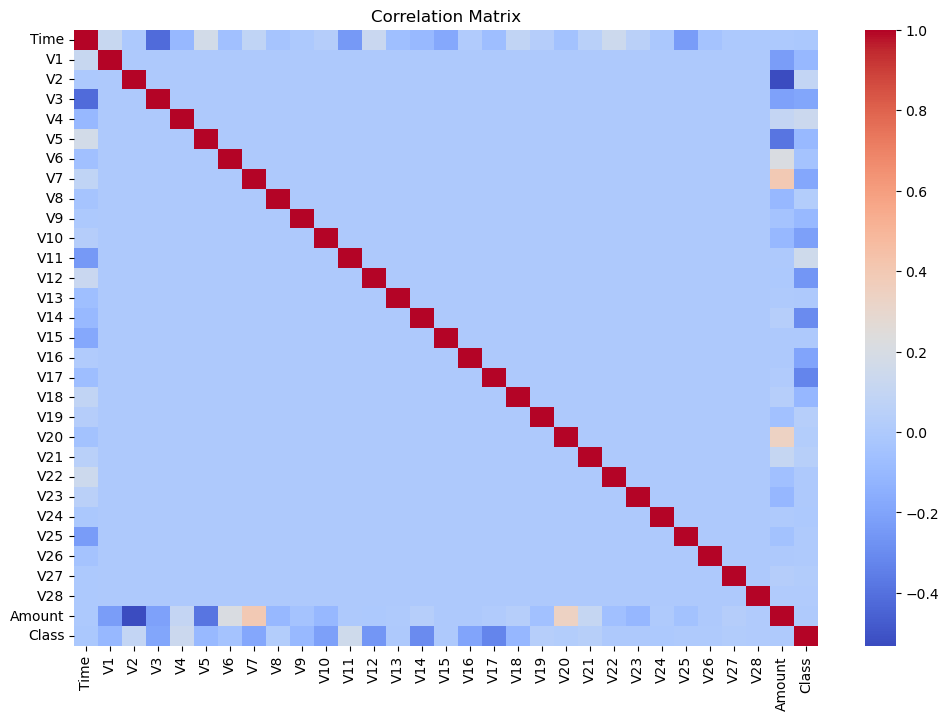

In [9]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
#There is no meaningful correlation exist between the vairables.

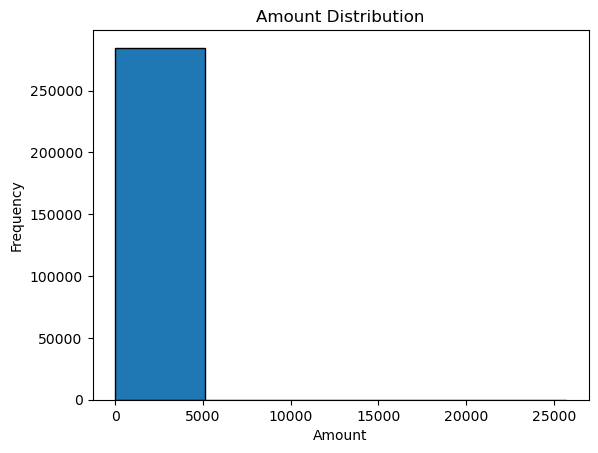

In [11]:
# Distribution of Transaction Amounts
#Customer Spending pattern
plt.hist(df['Amount'], bins=5, edgecolor='black')
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

### 4. Data Cleaning

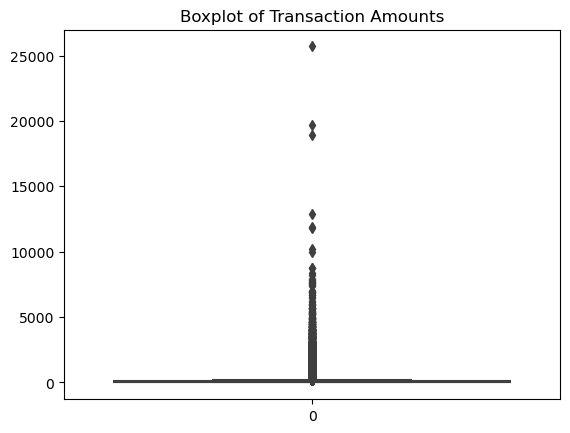

In [12]:
# Check for outliers and anomalies
sns.boxplot(df['Amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

In [13]:
# Drop the 'Time' column after conversion
df.drop(columns=['Time'], inplace=True)

In [14]:
# Standardize the 'Amount' feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

### 5. Balancing the data

In [15]:
# Separate the features and target
X = df.drop(columns=['Class'])
y = df['Class']

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
# Apply SMOTE to balance the data
sm = SMOTE(random_state=42)
# Apply SMOTE to balance the data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

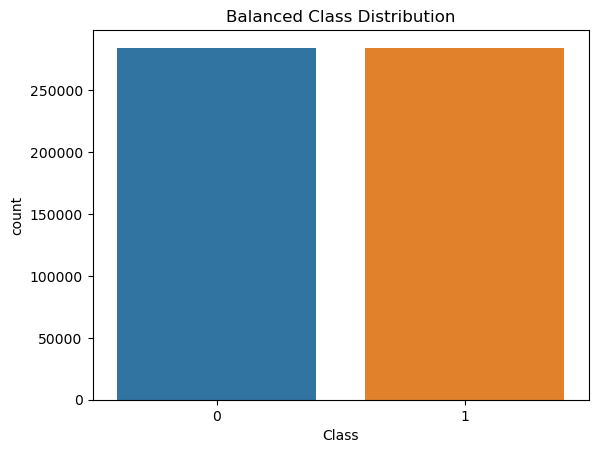

In [18]:
# Display the new class distribution
sns.countplot(x=y_res)
plt.title('Balanced Class Distribution')
plt.show()

### 6. Feature Engineering & Selection

In [19]:
correlation = df.corr()
high_correlation_features = correlation.index[abs(correlation["Class"]) > 0.5]
print(high_correlation_features)


Index(['Class'], dtype='object')


### 7. Train/Test Split

In [20]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [21]:
# Verify the split
print(f'Training data shape: {X_train.shape}, Test data shape: {X_test.shape}')

Training data shape: (398041, 29), Test data shape: (170589, 29)


### 8. Model Selection, Training, and Evaluation

In [22]:
#Logistic Regresion

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [24]:
lr = LogisticRegression()

In [25]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

In [26]:
# Perform Grid Search
grid_lr = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc')

In [27]:
# Best model
best_lr = grid_lr.best_estimator_

In [28]:
#XGBoost

In [29]:
from xgboost import XGBClassifier

# Initialize the model
xgb = XGBClassifier()

# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

In [30]:
# Perform Grid Search
grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc')
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [31]:
# Best model
best_xgb = grid_xgb.best_estimator_

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [10],
    'max_depth': [10],
    'min_samples_split': [2, 5]
}

# Perform Grid Search
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_

### 9. Model Validation

In [33]:
from sklearn.metrics import roc_auc_score, f1_score

# Predict on the test set with each model
y_pred_lr = best_lr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

# Calculate the AUC-ROC and F1-Score for each model
auc_lr = roc_auc_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

auc_rf = roc_auc_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

auc_xgb = roc_auc_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print the results
print(f"Logistic Regression - AUC: {auc_lr}, F1-Score: {f1_lr}")
print(f"Random Forest - AUC: {auc_rf}, F1-Score: {f1_rf}")
print(f"XGBoost - AUC: {auc_xgb}, F1-Score: {f1_xgb}")


Logistic Regression - AUC: 0.9468907813662659, F1-Score: 0.9454017798008261
Random Forest - AUC: 0.9876655098132011, F1-Score: 0.9875467661191658
XGBoost - AUC: 0.9998179661534486, F1-Score: 0.9998186190473405
